<h1>Entrega 1 </h1>

1.1) Represente en un mismo gráfico la sinusoide , la versión comprimida por un
𝑠𝑖𝑛(2𝑡)
factor 3 y expandida por un factor 2. ¿Qué conclusiones extrae de dichos gráficos?

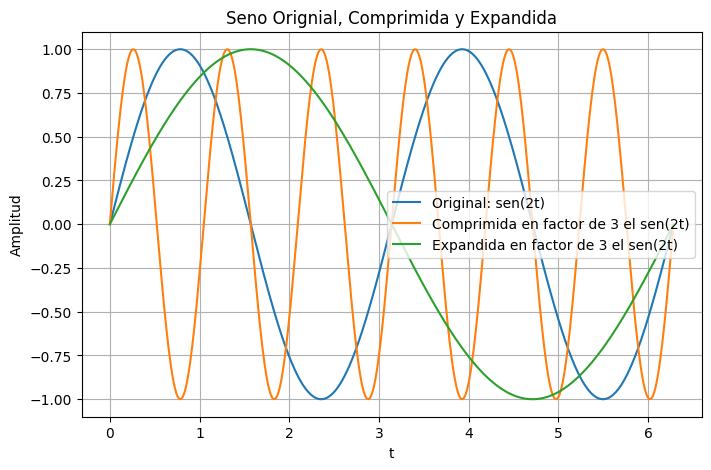

In [ ]:
import numpy as  np
import matplotlib.pyplot as plt

#rango de tiempo
t=np.linspace(0,2*np.pi,500)

#Señales
y_ori=np.sin(2*t) 
y_comp=np.sin(6*t) 
y_expa=np.sin(2*(t/2))

#graficar
plt.figure(figsize=(8,5))
plt.plot(t,y_ori,label="Original: sen(2t)")
plt.plot(t,y_comp,label="Comprimida en factor de 3 el sen(2t)")
plt.plot(t,y_expa,label="Expandida en factor de 3 el sen(2t)")

plt.xlabel("t")
plt.ylabel("Amplitud")
plt.title("Seno Orignial, Comprimida y Expandida")
plt. legend()
plt.grid(True)
plt.show()
#borrar

Procedimiento:
1) Defino un vector de tiempo t con un numpy.linspace para cubrir varios periodos y genero una señal original de np.sin(2*t)
2) Compresion: multiplico t por 3 --> np.sin(2*3t)
3) Expansion: dividimos t por 2 --> np.sin(2*(t/2))
4) grafico ñas 3 señales juntas usando matplotlib

Comentarios:
la comprension temproal povoca mas oscilaciones en el mismo intervalo (una frecuancia mas alta)
la expansion temporal reduce la cantidad de oscilaciones (frecuencia aprente mas baja)
El mismo principio sirve para cualquier tipo de señal, no solo senoidales

1.2) Graficar la función como usando un valor de b adecuado y de ∏(𝑡) 𝑢(𝑡 + 𝑏) − 𝑢(𝑡 − 𝑏) su elección.

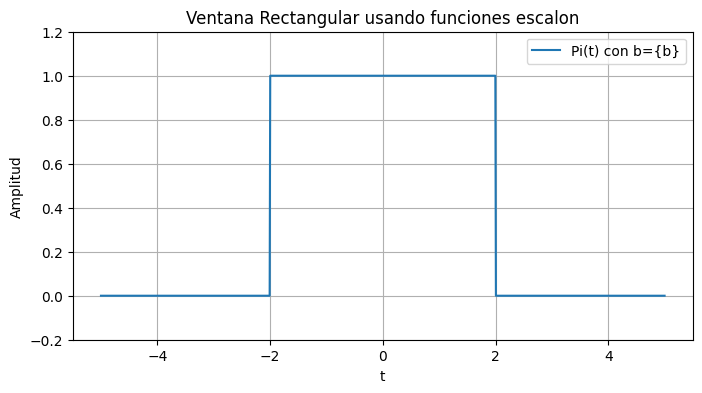

In [8]:
import numpy as np
import matplotlib.pyplot as plt

#defino la funcion escalon unitario
def u(t):
    return np.where(t>= 0,1,0)

#Parametro b
b=2

#Rango de tiempo
t=np.linspace(-5,5,1000)

#ventana rectangular: u(t+b) -u(t-b)
rect = u(t+b) - u(t-b)

#Graficar
plt.figure(figsize=(8,4))
plt.plot(t,rect,label="Pi(t) con b={b}")
plt.xlabel("t")
plt.ylabel("Amplitud")
plt.title("Ventana Rectangular usando funciones escalon")
plt.ylim(-0.2,1.2)
plt.grid(True)
plt.legend()
plt.show()


Procedimiento:

1) defino la funcion u(t) del escalon unitario ( de 0 a 1 en el tiempo)
2) establezco un rango de tiempo simetrico (-5≤t≤5) para poder visualizar la ventana completa
3) Se calculo la funcion pulso como la resta de u(t+b)-u(t-b). Esto me genera un pulso rectangular de amplitud 1

Observaciones:
interpretacion: termino u(t+b) "enciende" la señal en t=-b y el termino u(t-b) la "apaga" en t=b. Esta resta genera un pulso de amplitud 1 unicamente en el intervalo (-b,b)
Efecto de variar b:
    Si b aumenta, la ventana rectangular se ensancha
    Si b disminuye, la ventana se hace mas angosta
    
No presenta variaciones dentro de la ventana, lo que refleja que es una señal constante en ese dominio.

1.3) Graficar las señales, , 𝑥(𝑡) = 2𝑢(𝑡 + 2) − 𝑢(3 − 3𝑡) 𝑥(𝑡) = 𝑠𝑖𝑛𝑐(2𝑡/π), 𝑥(𝑡) = 𝑠𝑖𝑛𝑐(𝑡) ∏(𝑡/4)

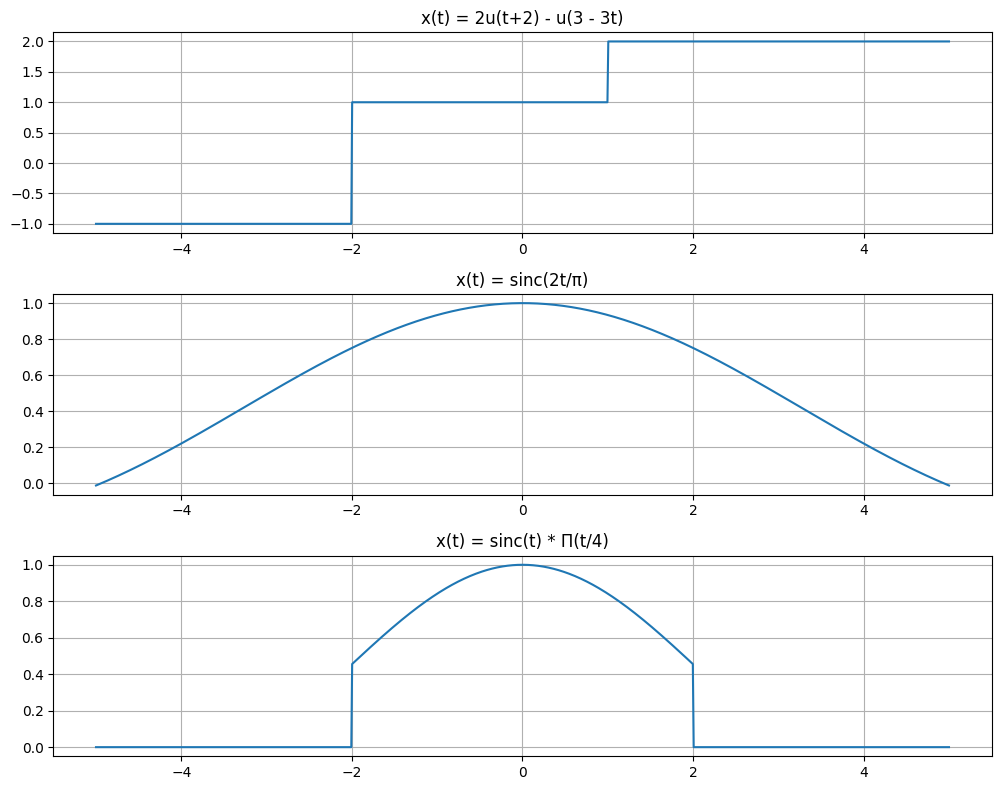

In [12]:
import numpy as np
import matplotlib.pyplot as plt

#escalon unitario
def u(t):
    return np.where(t>= 0,1,0)

#Ventana rectangular Pi(t)=u(t+0.5) - u(t-0.5) para argumento normalizado
def Pi(t):
    return np.where(np.abs(t)<0.5,1,0)

#rango de tiempo
t=np.linspace(-5,5,1000)

#1) 
x1=2*u(t+2)-u(3-3*t)

#2) con ajuste para sinc(x)=sen(x)/x
x2=np.sinc((2*t/np.pi)/np.pi)

#3)
x3=np.sinc(t/np.pi)*Pi(t/4)

plt.figure(figsize=(10,8))

plt.subplot(3,1,1)
plt.plot(t, x1)
plt.title('x(t) = 2u(t+2) - u(3 - 3t)')
plt.grid(True)

plt.subplot(3,1,2)
plt.plot(t, x2)
plt.title('x(t) = sinc(2t/π)')
plt.grid(True)

plt.subplot(3,1,3)
plt.plot(t, x3)
plt.title('x(t) = sinc(t) * Π(t/4)')
plt.grid(True)

plt.tight_layout()
plt.show()

de la señal 1:
implemento la señal escalon unitario con np.where
    2u(t+2) --> un escalon que se activa en t=-2 y tiene amplitud 2
    u(3-3t) --> un escalon que se apaga en t=1 ( activo para t≤1). La resta de ambas produce una señal por tramos, con saltos en t=-2 y t=1
Se verifica que las transiciones ocurren en los instantes calculados analiticamente y que los niveles de la señal coinciden con las amplitudes esperadas.

de la señal 2:
uso no.sinc adaptando el argumento para que coincida con la definicion matemarica utilzada en la materia
La funcion sinc es continua, par y con valor maximo 1 en t=0. El factor 2/π en el argumento modifica la frecuencia de oscilacion y el ancho de los lobulos.
Tenemos que tener cuidado con la definicion de np.sinc ya que en Python es sen(πx)/πx, mientras que en teoria de señales puede definirse como sen(x)/x. Esto implica un ajuste del argumento para que el grafico sea coherente con la deficnion teorica.

de la señal 3:
implementamos la ventana rectangular con np.where, que vale 1 para |t|<1/2 en su argumento normalizado. Luego multiplico por la sinc por esta ventana para recortarla
La sinc es infinita en extension, pero la ventana rectangular de ancho 4 la "recorta" en el intervalo -2<t<2, dejando el resto en cero.
El producto entre una señal infinita y una ventana rectangular es equivalente a aplicar un filtro temporal ideal de duracion finita, algo muy comun en procesamiento de señales al trabajar con señales truncadas.

1.4) Representar la señal 𝑥(𝑡) = 𝑠𝑖𝑛(2π𝑡) ∏(𝑡 − 1/2) y computar su energía.

Energía de la señal: 0.5


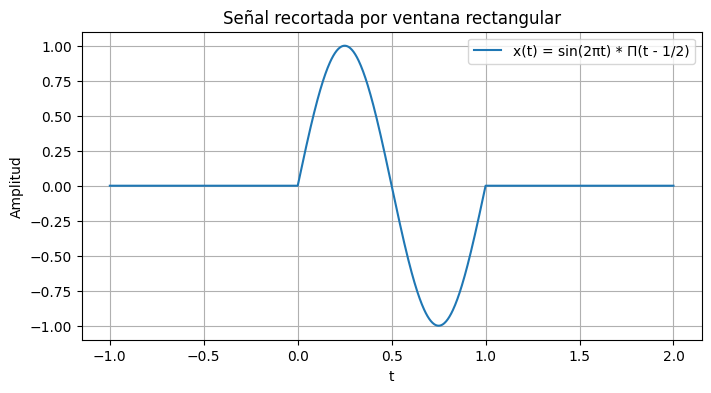

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


t=np.linspace(-1,2,1000)

#señal pedida  𝑥(𝑡) = 𝑠𝑖𝑛(2π𝑡) ∏(𝑡 − 1/2)
x = np.sin(2*np.pi*t)*np.where(np.abs(t - 0.5) < 0.5, 1, 0)

#energia de la funcion
energia = np.trapezoid(np.abs(x)**2, t)

print("Energía de la señal:", energia)

#Graficar
plt.figure(figsize=(8,4))
plt.plot(t, x, label='x(t) = sin(2πt) * Π(t - 1/2)')
plt.xlabel("t")
plt.ylabel("Amplitud")
plt.title("Señal recortada por ventana rectangular")
plt.grid(True)
plt.legend()
plt.show()


Se genero un vector t con linspace para cubrir un intervalo mas grande que la duracion de la ventana
usamos la condicion de .abs para que la ventana valga 1 unicamente cuando 0<t<1. .where crea el vector de la ventana
Se multiplica la sinusoide por la ventana rectangular para " recortar" la señal (np.sin(2*np.pi*t))
Se usa la defincion de energia, siendo la integral de -inf a inf del modulo de x(t) al cuadrado. Como la señal es no nula solo en el intervalo 0<t<1, la integral se limita solo a ese intervalo. Con trapezoid se iimplementa la regla del trapceio para integrar numericamente 
La ventana rectangular Π(t−1/2) desplaza y crecorta la sinusoide, manteniendola solo entre 0 y 1 segundos
El recorte hace que la señal tenga energia finita, a diferencia de una sinusoide infinita que tendria potencia pero energia infinita.

1.5) Graficar la señal y compute su potencia.
𝑥(𝑡) = 2 𝑐𝑜𝑠(3𝑡 + 5) + 3 𝑐𝑜𝑠(2𝑡 + 2)
Verificar gráficamente que la Potencia es 𝑃(𝑥) = 18

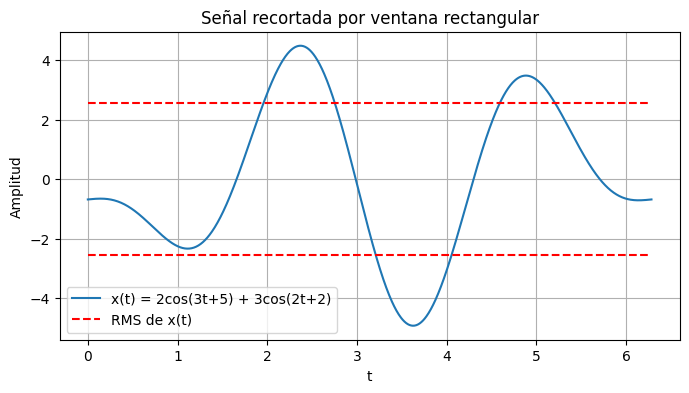

Potencia de la señal: 6.4940


In [15]:
import numpy as np
import matplotlib.pyplot as plt 

t = np.linspace(0, 2*np.pi, 1000)

x= 2*np.cos(3*t+5)+3*np.cos(2*t+2)


plt.figure(figsize=(8,4))
plt.plot(t, x, label='x(t) = 2cos(3t+5) + 3cos(2t+2)')
plt.hlines(y=np.sqrt(P), xmin=t[0], xmax=t[-1], colors='r', linestyles='--', label='RMS de x(t)')
plt.hlines(y=-np.sqrt(P), xmin=t[0], xmax=t[-1], colors='r', linestyles='--')
plt.xlabel("t")
plt.ylabel("Amplitud")
plt.title("Señal recortada por ventana rectangular")
plt.grid(True)
plt.legend()
plt.show()

P=np.mean(x**2)
print(f"Potencia de la señal: {P:.4f}")


1.6)

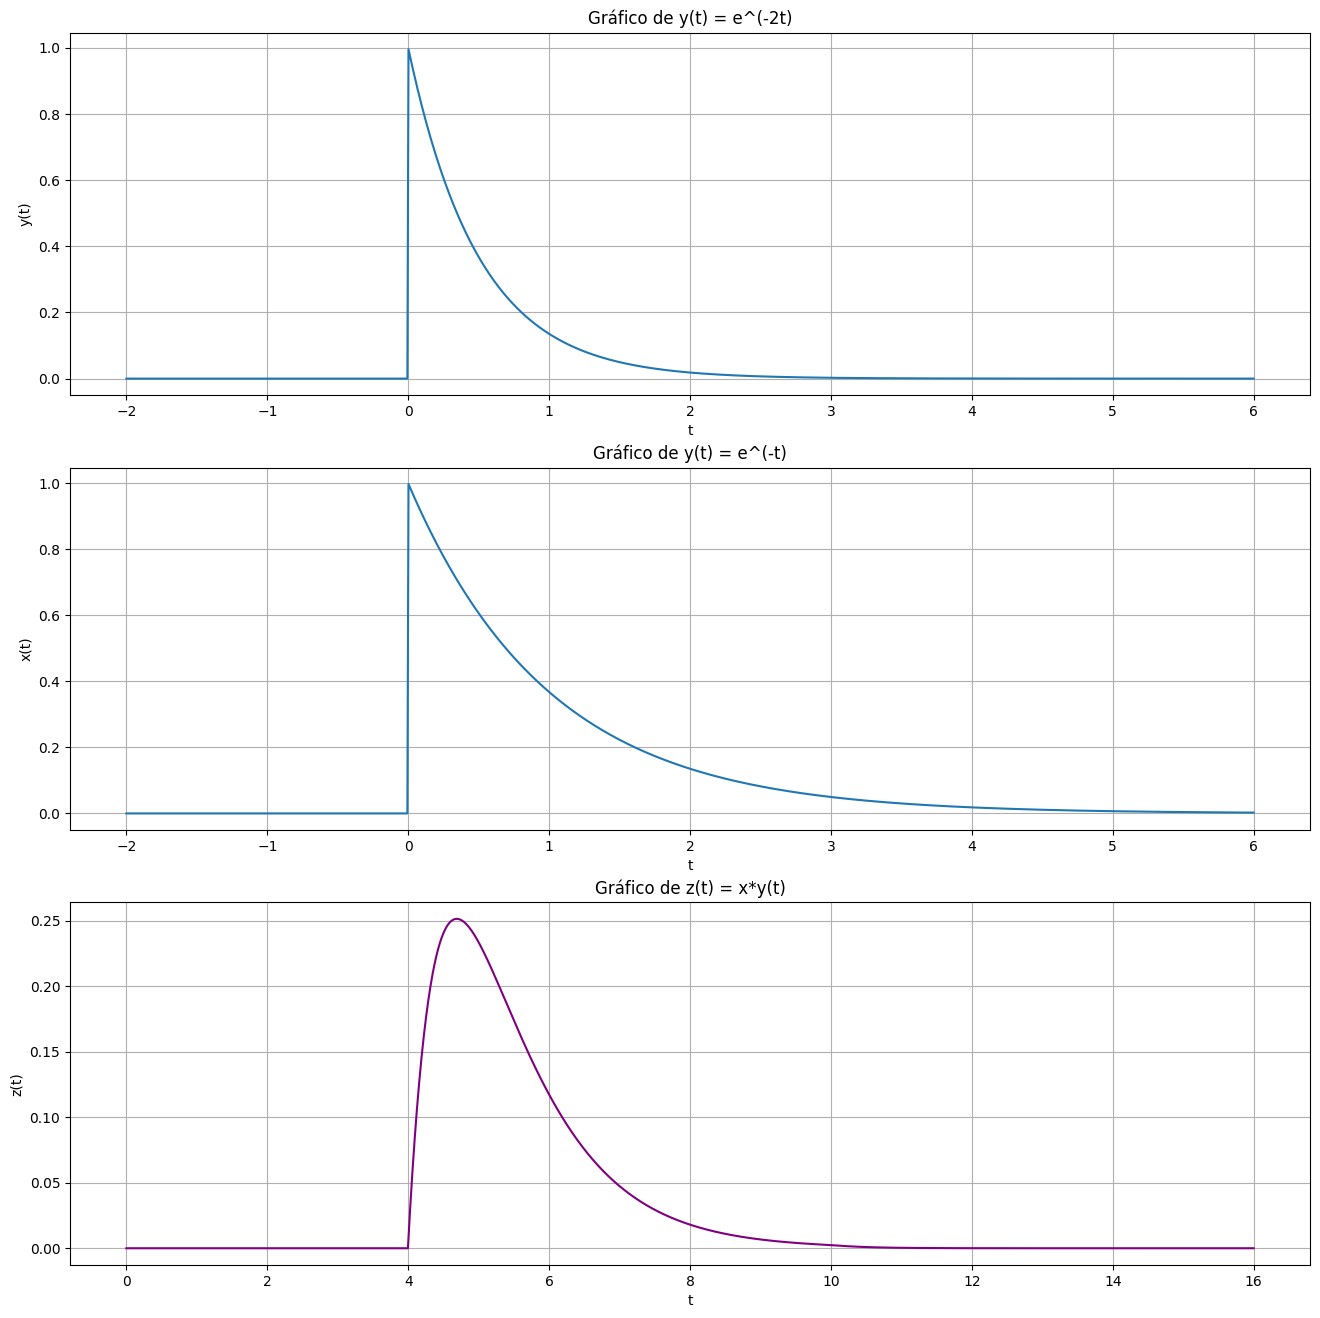

In [68]:
import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(-2, 6, 1000)
dt = t[1]-t[0]
def u(t):
    return np.where(t >= 0, 1, 0)
#y(t)
y = (np.exp(-2*t))*u(t)
#x(t)
x = (np.exp(-t))*u(t)
#convolucion x*y
z = np.convolve(x, y, mode="full") * dt
t_conv = np.arange(len(z)) * dt  # eje temporal de la convolución

plt.figure(figsize=(16,16))
# Grafico y 
plt.subplot(3,1,1)
plt.plot(t, y, label=r"$e^{-2t}$")
plt.title("Gráfico de y(t) = e^(-2t)")
plt.xlabel("t")
plt.ylabel("y(t)")
plt.grid(True)

# Grafico x 
plt.subplot(3,1,2)
plt.plot(t, x, label=r"$e^{-t}$")
plt.title("Gráfico de y(t) = e^(-t)")
plt.xlabel("t")
plt.ylabel("x(t)")
plt.grid(True)

# Grafico x 
plt.subplot(3,1,3)
plt.plot(t_conv, z, label=r"(x*y)(t)", color="purple")
plt.title("Gráfico de z(t) = x*y(t)")
plt.xlabel("t")
plt.ylabel("z(t)")
plt.grid(True)


plt.show()
    

1.7)

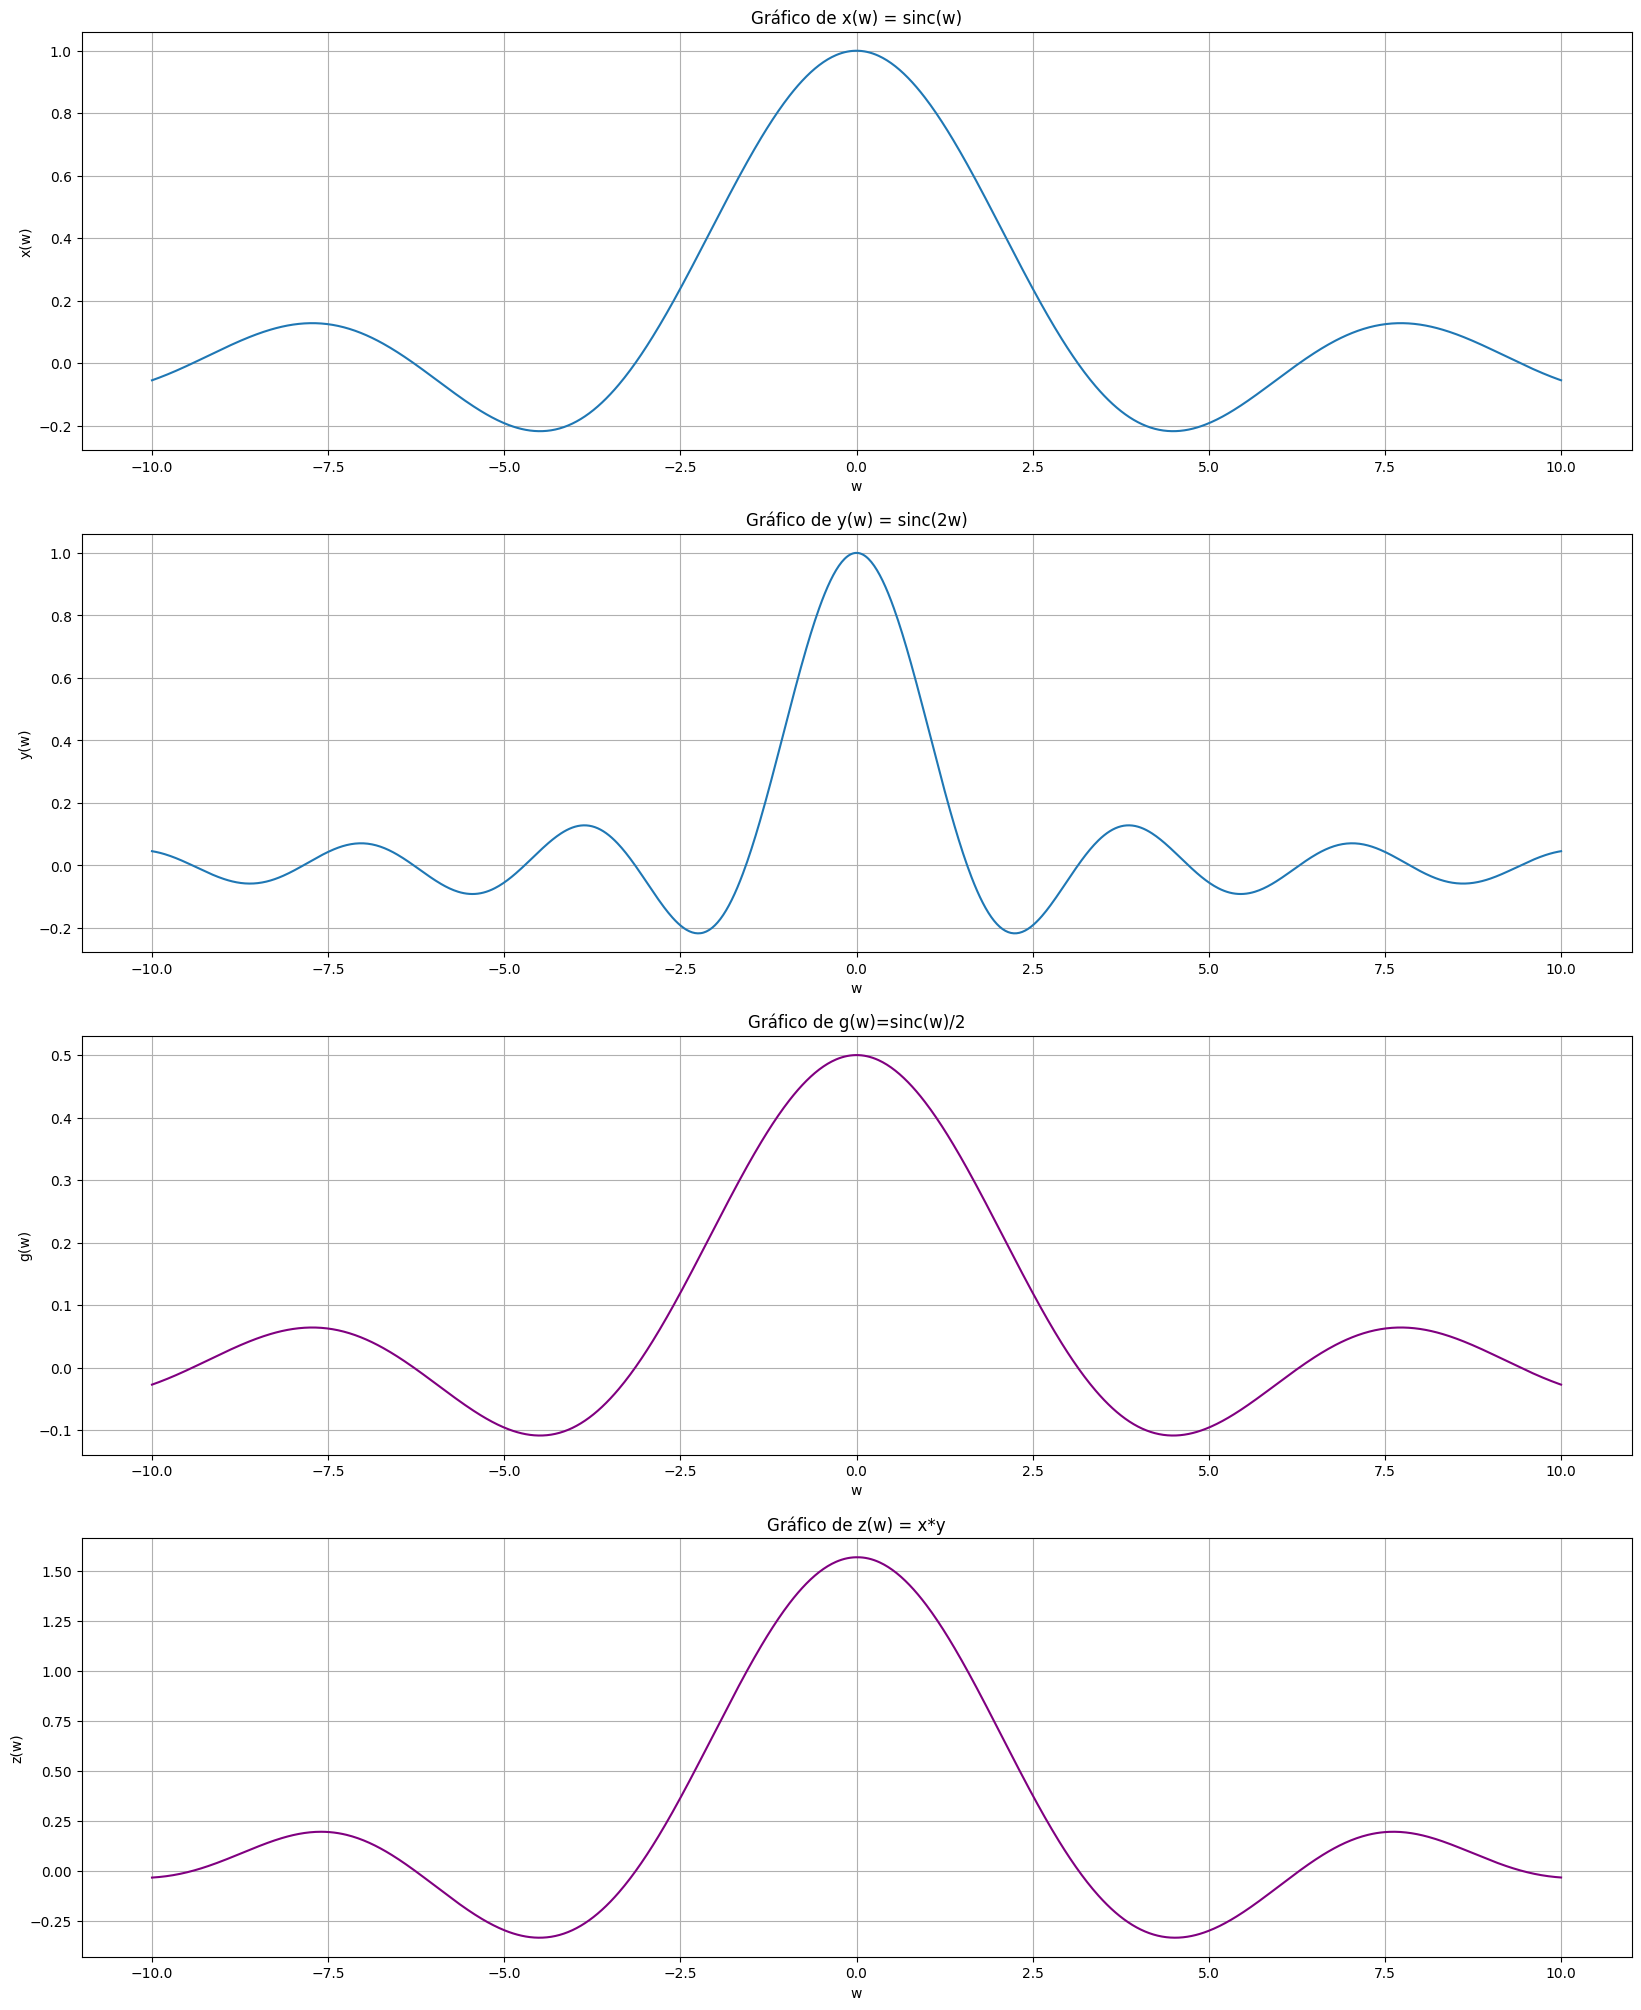

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

w = np.linspace(-10, 10, 1000)


def x(w):
    return np.sinc(w/np.pi) 
def y(w):
    return np.sinc((2*w)/np.pi)
def g(w):
    return (np.sinc(w/np.pi))/2

dw = w[1] - w[0]
z = np.convolve(x(w), y(w), mode='same') * dw  # aprox a convolución continua


plt.figure(figsize=(20,25))
# Grafico x 
plt.subplot(4,1,1)
plt.plot(w, x(w))
plt.title("Gráfico de x(w) = sinc(w)")
plt.xlabel("w")
plt.ylabel("x(w)")
plt.grid(True)

# Grafico y 
plt.subplot(4,1,2)
plt.plot(w, y(w))
plt.title("Gráfico de y(w) = sinc(2w)")
plt.xlabel("w")
plt.ylabel("y(w)")
plt.grid(True)

# Grafico g 
plt.subplot(4,1,3)
plt.plot(w, g(w), color="purple")
plt.title("Gráfico de g(w)=sinc(w)/2")
plt.xlabel("w")
plt.ylabel("g(w)")
plt.grid(True)

# Grafico z
plt.subplot(4,1,4)
plt.plot(w, z, color="purple")
plt.title("Gráfico de z(w) = x*y")
plt.xlabel("w")
plt.ylabel("z(w)")
plt.grid(True)


plt.show()

Que la variable independiente sea w en lugar de t implica que estamos trabajando en el dominio frecuencial. Las funciones representadas describen espectros de señales, no señales temporales. Por lo tanto, la convolución realizada en este punto refleja la combinación de contenidos espectrales y no la superposición en el tiempo.